In [1]:
import pandas as pd
import geopandas as gp
import matplotlib as plt

sharedFolder = '/work/group/egodat/reu23_clark/'
dataFolder = sharedFolder + 'data/'

In [2]:
migration = pd.read_csv(dataFolder + "Migration/co-est2020-alldata.csv", encoding="latin1")

In [3]:
migration["FIPS"] = migration["STATE"] * 1000 + migration["COUNTY"]

In [4]:
migration["FIPS"]

0        1000
1        1001
2        1003
3        1005
4        1007
        ...  
3189    56037
3190    56039
3191    56041
3192    56043
3193    56045
Name: FIPS, Length: 3194, dtype: int64

In [5]:
migration

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019,RNETMIG2020,FIPS
0,40,3,6,1,0,Alabama,Alabama,4779736,4780118,4785514,...,1.282825,1.614391,0.653828,0.730419,0.854384,1.197150,1.966095,2.677866,3.091308,1000
1,50,3,6,1,1,Alabama,Autauga County,54571,54582,54761,...,-5.971016,-3.773344,2.206640,-1.529706,4.954403,0.993228,-0.018021,3.486011,6.290545,1001
2,50,3,6,1,3,Alabama,Baldwin County,182265,182263,183121,...,17.670696,22.924288,20.300088,17.902273,21.436499,22.476720,24.846335,25.242507,26.401562,1003
3,50,3,6,1,5,Alabama,Barbour County,27457,27454,27325,...,-6.860371,-8.093425,-5.063857,-15.677998,-18.377839,-25.138734,-8.790155,-6.257064,0.649799,1005
4,50,3,6,1,7,Alabama,Bibb County,22915,22904,22858,...,-3.789130,-5.800695,1.420612,1.286202,-0.841769,-3.235672,-7.271592,0.268980,-7.199262,1007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43580,...,15.410190,-4.433558,-12.751566,-13.455712,-17.688190,-20.936101,-15.589918,-10.452355,-9.510457,56037
3190,50,4,8,56,39,Wyoming,Teton County,21294,21298,21298,...,2.322071,23.284369,12.672811,4.881876,1.035867,-1.543805,-13.120659,0.171505,0.383943,56039
3191,50,4,8,56,41,Wyoming,Uinta County,21118,21121,21090,...,-4.151853,-10.624866,-15.022486,-10.381621,-11.424990,-18.658892,-14.135663,-8.840598,-2.177625,56041
3192,50,4,8,56,43,Wyoming,Washakie County,8533,8528,8531,...,-3.084040,-1.307423,-19.048760,0.000000,-15.064998,-16.056321,-16.101642,-7.638447,-6.801848,56043


In [6]:
xwalk = pd.read_pickle(dataFolder + "/xwalk_data_combined.pkl")

In [7]:
xwalk

,ctyname,bgrp,cbsa
0,"Rockingham County, NH",330150710012,14460
1,"Merrimack County, NH",330130380002,18180
2,"Merrimack County, NH",330130415001,18180
3,"Hillsborough County, NH",330110225011,31700
4,"Hillsborough County, NH",330110103022,31700
...,...,...,...
57404,"Elko County, NV",320079515003,21220
57405,"Elko County, NV",320079515003,21220
57406,"Elko County, NV",320079517002,21220
57407,"Elko County, NV",320079502001,21220


In [8]:
xwalk["county_FIPS"] = xwalk["bgrp"] // 10 ** 7 

In [9]:
countyToCbsa = xwalk.groupby('county_FIPS').first()['cbsa']
countyToCbsa = dict(zip(countyToCbsa.index, countyToCbsa.values))

In [10]:
migration['cbsa'] = migration['FIPS'].apply(lambda c: countyToCbsa.get(c, 99999))

In [11]:
migration_cbsas = migration[migration["cbsa"] < 99999]

In [12]:
migration[migration['FIPS'] == 48389]['RNETMIG2011']

2762    13.679499
Name: RNETMIG2011, dtype: float64

In [13]:
columns1 = list(migration_cbsas.columns)
less_columns1 = columns1[5:]
less_columns1

['STNAME',
 'CTYNAME',
 'CENSUS2010POP',
 'ESTIMATESBASE2010',
 'POPESTIMATE2010',
 'POPESTIMATE2011',
 'POPESTIMATE2012',
 'POPESTIMATE2013',
 'POPESTIMATE2014',
 'POPESTIMATE2015',
 'POPESTIMATE2016',
 'POPESTIMATE2017',
 'POPESTIMATE2018',
 'POPESTIMATE2019',
 'POPESTIMATE2020',
 'NPOPCHG_2010',
 'NPOPCHG_2011',
 'NPOPCHG_2012',
 'NPOPCHG_2013',
 'NPOPCHG_2014',
 'NPOPCHG_2015',
 'NPOPCHG_2016',
 'NPOPCHG_2017',
 'NPOPCHG_2018',
 'NPOPCHG_2019',
 'NPOPCHG_2020',
 'BIRTHS2010',
 'BIRTHS2011',
 'BIRTHS2012',
 'BIRTHS2013',
 'BIRTHS2014',
 'BIRTHS2015',
 'BIRTHS2016',
 'BIRTHS2017',
 'BIRTHS2018',
 'BIRTHS2019',
 'BIRTHS2020',
 'DEATHS2010',
 'DEATHS2011',
 'DEATHS2012',
 'DEATHS2013',
 'DEATHS2014',
 'DEATHS2015',
 'DEATHS2016',
 'DEATHS2017',
 'DEATHS2018',
 'DEATHS2019',
 'DEATHS2020',
 'NATURALINC2010',
 'NATURALINC2011',
 'NATURALINC2012',
 'NATURALINC2013',
 'NATURALINC2014',
 'NATURALINC2015',
 'NATURALINC2016',
 'NATURALINC2017',
 'NATURALINC2018',
 'NATURALINC2019',
 'NATURALI

In [14]:
migration_small = migration_cbsas[less_columns1]
final_data = migration_small.groupby(by= "cbsa").agg({
 'STNAME': 'sum',
 'CTYNAME': 'sum',
 'CENSUS2010POP': 'sum',
 'ESTIMATESBASE2010': 'sum',
 'POPESTIMATE2010': 'sum',
 'POPESTIMATE2011': 'sum',
 'POPESTIMATE2012': 'sum',
 'POPESTIMATE2013': 'sum',
 'POPESTIMATE2014': 'sum',
 'POPESTIMATE2015': 'sum',
 'POPESTIMATE2016': 'sum',
 'POPESTIMATE2017': 'sum',
 'POPESTIMATE2018': 'sum',
 'POPESTIMATE2019': 'sum',
 'POPESTIMATE2020': 'sum',
 'NPOPCHG_2010': 'sum',
 'NPOPCHG_2011': 'sum',
 'NPOPCHG_2012': 'sum',
 'NPOPCHG_2013': 'sum',
 'NPOPCHG_2014': 'sum',
 'NPOPCHG_2015': 'sum',
 'NPOPCHG_2016': 'sum',
 'NPOPCHG_2017': 'sum',
 'NPOPCHG_2018': 'sum',
 'NPOPCHG_2019': 'sum',
 'NPOPCHG_2020': 'sum',
 'BIRTHS2010': 'sum',
 'BIRTHS2011': 'sum',
 'BIRTHS2012': 'sum',
 'BIRTHS2013': 'sum',
 'BIRTHS2014': 'sum',
 'BIRTHS2015': 'sum',
 'BIRTHS2016': 'sum',
 'BIRTHS2017': 'sum',
 'BIRTHS2018': 'sum',
 'BIRTHS2019': 'sum',
 'BIRTHS2020': 'sum',
 'DEATHS2010': 'sum',
 'DEATHS2011': 'sum',
 'DEATHS2012': 'sum',
 'DEATHS2013': 'sum',
 'DEATHS2014': 'sum',
 'DEATHS2015': 'sum',
 'DEATHS2016': 'sum',
 'DEATHS2017': 'sum',
 'DEATHS2018': 'sum',
 'DEATHS2019': 'sum',
 'DEATHS2020': 'sum',
 'NATURALINC2010': 'sum',
 'NATURALINC2011': 'sum',
 'NATURALINC2012': 'sum',
 'NATURALINC2013': 'sum',
 'NATURALINC2014': 'sum',
 'NATURALINC2015': 'sum',
 'NATURALINC2016': 'sum',
 'NATURALINC2017': 'sum',
 'NATURALINC2018': 'sum',
 'NATURALINC2019': 'sum',
 'NATURALINC2020': 'sum',
 'INTERNATIONALMIG2010': 'sum',
 'INTERNATIONALMIG2011': 'sum',
 'INTERNATIONALMIG2012': 'sum',
 'INTERNATIONALMIG2013': 'sum',
 'INTERNATIONALMIG2014': 'sum',
 'INTERNATIONALMIG2015': 'sum',
 'INTERNATIONALMIG2016': 'sum',
 'INTERNATIONALMIG2017': 'sum',
 'INTERNATIONALMIG2018': 'sum',
 'INTERNATIONALMIG2019': 'sum',
 'INTERNATIONALMIG2020': 'sum',
 'DOMESTICMIG2010': 'sum',
 'DOMESTICMIG2011': 'sum',
 'DOMESTICMIG2012': 'sum',
 'DOMESTICMIG2013': 'sum',
 'DOMESTICMIG2014': 'sum',
 'DOMESTICMIG2015': 'sum',
 'DOMESTICMIG2016': 'sum',
 'DOMESTICMIG2017': 'sum',
 'DOMESTICMIG2018': 'sum',
 'DOMESTICMIG2019': 'sum',
 'DOMESTICMIG2020': 'sum',
 'NETMIG2010': 'sum',
 'NETMIG2011': 'sum',
 'NETMIG2012': 'sum',
 'NETMIG2013': 'sum',
 'NETMIG2014': 'sum',
 'NETMIG2015': 'sum',
 'NETMIG2016': 'sum',
 'NETMIG2017': 'sum',
 'NETMIG2018': 'sum',
 'NETMIG2019': 'sum',
 'NETMIG2020': 'sum',
 'RESIDUAL2010': 'sum',
 'RESIDUAL2011': 'sum',
 'RESIDUAL2012': 'sum',
 'RESIDUAL2013': 'sum',
 'RESIDUAL2014': 'sum',
 'RESIDUAL2015': 'sum',
 'RESIDUAL2016': 'sum',
 'RESIDUAL2017': 'sum',
 'RESIDUAL2018': 'sum',
 'RESIDUAL2019': 'sum',
 'RESIDUAL2020': 'sum',
 'GQESTIMATESBASE2010': 'sum',
 'GQESTIMATES2010': 'sum',
 'GQESTIMATES2011': 'sum',
 'GQESTIMATES2012': 'sum',
 'GQESTIMATES2013': 'sum',
 'GQESTIMATES2014': 'sum',
 'GQESTIMATES2015': 'sum',
 'GQESTIMATES2016': 'sum',
 'GQESTIMATES2017': 'sum',
 'GQESTIMATES2018': 'sum',
 'GQESTIMATES2019': 'sum',
 'GQESTIMATES2020': 'sum',
 'RBIRTH2011' : 'mean',
 'RBIRTH2012': 'mean',
 'RBIRTH2013': 'mean',
 'RBIRTH2014': 'mean',
 'RBIRTH2015': 'mean',
 'RBIRTH2016': 'mean',
 'RBIRTH2017': 'mean',
 'RBIRTH2018': 'mean',
 'RBIRTH2019': 'mean',
 'RBIRTH2020': 'mean',
 'RDEATH2011': 'mean',
 'RDEATH2012': 'mean',
 'RDEATH2013': 'mean',
 'RDEATH2014': 'mean',
 'RDEATH2015': 'mean',
 'RDEATH2016': 'mean',
 'RDEATH2017': 'mean',
 'RDEATH2018': 'mean',
 'RDEATH2019': 'mean',
 'RDEATH2020': 'mean',
 'RNATURALINC2011': 'mean',
 'RNATURALINC2012': 'mean',
 'RNATURALINC2013': 'mean',
 'RNATURALINC2014': 'mean',
 'RNATURALINC2015': 'mean',
 'RNATURALINC2016': 'mean',
 'RNATURALINC2017': 'mean',
 'RNATURALINC2018': 'mean',
 'RNATURALINC2019': 'mean',
 'RNATURALINC2020': 'mean',
 'RINTERNATIONALMIG2011': 'mean',
 'RINTERNATIONALMIG2012': 'mean',
 'RINTERNATIONALMIG2013': 'mean',
 'RINTERNATIONALMIG2014': 'mean',
 'RINTERNATIONALMIG2015': 'mean',
 'RINTERNATIONALMIG2016': 'mean',
 'RINTERNATIONALMIG2017': 'mean',
 'RINTERNATIONALMIG2018': 'mean',
 'RINTERNATIONALMIG2019': 'mean',
 'RINTERNATIONALMIG2020': 'mean',
 'RDOMESTICMIG2011': 'mean',
 'RDOMESTICMIG2012': 'mean',
 'RDOMESTICMIG2013': 'mean',
 'RDOMESTICMIG2014': 'mean',
 'RDOMESTICMIG2015': 'mean',
 'RDOMESTICMIG2016': 'mean',
 'RDOMESTICMIG2017': 'mean',
 'RDOMESTICMIG2018': 'mean',
 'RDOMESTICMIG2019': 'mean',
 'RDOMESTICMIG2020': 'mean',
 'RNETMIG2011': 'mean',
 'RNETMIG2012': 'mean',
 'RNETMIG2013': 'mean',
 'RNETMIG2014': 'mean',
 'RNETMIG2015': 'mean',
 'RNETMIG2016': 'mean',
 'RNETMIG2017': 'mean',
 'RNETMIG2018': 'mean',
 'RNETMIG2019': 'mean',
 'RNETMIG2020': 'mean'})
final_data.loc[37780]['RNETMIG2011']

68.2922632935

In [15]:
migration_small[migration_small['cbsa'] == 37780]

,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,...,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019,RNETMIG2020,FIPS,cbsa
2718,Texas,Loving County,82,82,84,95,86,106,89,119,...,208.333333,-174.358974,278.846154,-33.898305,152.000000,92.198582,101.910828,92.485549,48301,37780
2762,Texas,Reeves County,13783,13783,13830,14095,14256,14478,15103,15556,...,12.041484,35.292925,22.309925,-29.389772,-9.491168,17.631502,24.747909,-5.015674,48389,37780


In [16]:
final_data.to_pickle(dataFolder + "/2010-2020_net_migration.pkl")

In [22]:
migration2021 = pd.read_csv(dataFolder + "Migration/co-est2021-alldata.csv", encoding= "latin1")

In [23]:
migration2022 = pd.read_csv(dataFolder + "Migration/co-est2022-alldata.csv", encoding= "latin1")

In [25]:
migration2022

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,...,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
0,40,3,6,1,0,Alabama,Alabama,5024356,5031362,5049846,...,13.699945,13.210008,-2.369557,-1.696934,0.358092,0.908126,5.496167,5.651639,5.854259,6.559766
1,50,3,6,1,1,Alabama,Autauga County,58802,58902,59210,...,11.548361,11.313872,0.203197,0.605200,0.253996,0.453900,4.063939,8.540040,4.317936,8.993940
2,50,3,6,1,3,Alabama,Baldwin County,231761,233219,239361,...,12.882475,11.976220,-2.865123,-2.050243,0.444369,1.296841,29.493419,28.744576,29.937788,30.041417
3,50,3,6,1,5,Alabama,Barbour County,25224,24960,24539,...,15.475060,15.108133,-4.323320,-3.858260,0.000000,0.162453,-12.444696,9.869022,-12.444696,10.031475
4,50,3,6,1,7,Alabama,Bibb County,22300,22183,22370,...,14.275133,14.467606,-3.321886,-3.290141,0.044890,0.090141,11.626602,-13.566197,11.671492,-13.476056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,50,4,8,56,37,Wyoming,Sweetwater County,42267,42190,41582,...,10.122714,10.515272,0.716230,0.409999,0.405864,1.157645,-15.303443,-7.162926,-14.897579,-6.005282
3191,50,4,8,56,39,Wyoming,Teton County,23323,23377,23622,...,3.957531,4.476753,5.404370,4.732567,0.255325,1.065894,4.553288,-20.294613,4.808613,-19.228719
3192,50,4,8,56,41,Wyoming,Uinta County,20446,20457,20655,...,8.999805,9.621196,2.043199,1.305388,0.000000,-0.193391,7.151197,2.030604,7.151197,1.837213
3193,50,4,8,56,43,Wyoming,Washakie County,7682,7658,7712,...,14.313598,14.905061,-4.814574,-5.184369,0.000000,-0.129609,11.971373,6.739680,11.971373,6.610071


In [26]:
migration2022["FIPS"] = migration2022["STATE"] * 1000 + migration2022["COUNTY"]

In [27]:
migration2022['cbsa'] = migration2022['FIPS'].apply(lambda c: countyToCbsa.get(c, 99999))

In [28]:
migration2022_cbsas = migration2022[migration2022["cbsa"] < 99999]

In [29]:
columns = migration2022.columns
less_columns = columns[5:]

In [31]:
migration2022.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'ESTIMATESBASE2020', 'POPESTIMATE2020', 'POPESTIMATE2021',
       'POPESTIMATE2022', 'NPOPCHG2020', 'NPOPCHG2021', 'NPOPCHG2022',
       'BIRTHS2020', 'BIRTHS2021', 'BIRTHS2022', 'DEATHS2020', 'DEATHS2021',
       'DEATHS2022', 'NATURALCHG2020', 'NATURALCHG2021', 'NATURALCHG2022',
       'INTERNATIONALMIG2020', 'INTERNATIONALMIG2021', 'INTERNATIONALMIG2022',
       'DOMESTICMIG2020', 'DOMESTICMIG2021', 'DOMESTICMIG2022', 'NETMIG2020',
       'NETMIG2021', 'NETMIG2022', 'RESIDUAL2020', 'RESIDUAL2021',
       'RESIDUAL2022', 'GQESTIMATESBASE2020', 'GQESTIMATES2020',
       'GQESTIMATES2021', 'GQESTIMATES2022', 'RBIRTH2021', 'RBIRTH2022',
       'RDEATH2021', 'RDEATH2022', 'RNATURALCHG2021', 'RNATURALCHG2022',
       'RINTERNATIONALMIG2021', 'RINTERNATIONALMIG2022', 'RDOMESTICMIG2021',
       'RDOMESTICMIG2022', 'RNETMIG2021', 'RNETMIG2022', 'FIPS', 'cbsa'],
      dtype='object')

In [34]:
migration2022_small = migration2022_cbsas[less_columns]
final_data2022 = migration2022_small.groupby(by= "cbsa").agg({
    'POPESTIMATE2021':'sum',
    'POPESTIMATE2022':'sum',
    'NPOPCHG2021':'sum',
    'NPOPCHG2022':'sum',
    'BIRTHS2021':'sum',
    'BIRTHS2022':'sum',
    'DEATHS2021':'sum',
    'DEATHS2022':'sum',
    'NATURALCHG2021':'sum',
    'NATURALCHG2022':'sum',
    'INTERNATIONALMIG2021':'sum',
    'INTERNATIONALMIG2022':'sum',
    'DOMESTICMIG2021':'sum',
    'DOMESTICMIG2022':'sum',
    'NETMIG2021':'sum',
    'NETMIG2022':'sum',
    'RESIDUAL2021':'sum',
    'RESIDUAL2022':'sum',
    'GQESTIMATES2021':'sum',
    'GQESTIMATES2022':'sum',
    'RBIRTH2021':'mean',
    'RBIRTH2022':'mean',
    'RDEATH2021':'mean',
    'RDEATH2022':'mean',
    'RNATURALCHG2021':'mean',
    'RNATURALCHG2022':'mean',
    'RINTERNATIONALMIG2021':'mean',
    'RINTERNATIONALMIG2022':'mean',
    'RDOMESTICMIG2021':'mean',
    'RDOMESTICMIG2022':'mean',
    'RNETMIG2021':'mean',
    'RNETMIG2022':'mean'
})
final_data2022

,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG2021,NPOPCHG2022,BIRTHS2021,BIRTHS2022,DEATHS2021,DEATHS2022,NATURALCHG2021,NATURALCHG2022,...,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
cbsa,,,,,,,,,,,,,,,,,,,,,
10100,42118,42037,-86,-81,461,473,506,456,-45,17,...,13.446805,11.957595,-0.924904,0.886000,1.147674,2.726604,3.541333,-0.552677,4.689007,2.173927
10140,76787,77038,932,251,677,692,1060,1133,-383,-441,...,13.888707,14.731026,-5.018278,-5.733788,0.144128,0.234032,17.452602,8.633187,17.596730,8.867219
10180,177829,179308,963,1479,2140,2226,2360,2272,-220,-46,...,14.941277,14.205686,-5.124231,-4.109509,0.392299,1.110819,16.400186,11.060707,16.792486,12.171526
10220,38195,38141,108,-54,507,517,545,566,-38,-49,...,14.289085,14.829176,-0.996303,-1.283798,0.078656,0.288200,3.093784,-0.078600,3.172439,0.209600
10300,99202,98567,-118,-635,948,975,1254,1265,-306,-290,...,12.633361,12.792703,-3.082782,-2.932714,0.362680,1.001168,0.795882,-4.267605,1.158562,-3.266437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49660,537837,535499,-2374,-2338,5272,5333,8756,8820,-3484,-3487,...,16.227475,16.386360,-6.546588,-6.548852,0.139583,0.397572,1.383251,1.938198,1.522834,2.335771
49700,182254,182813,796,559,2349,2429,1848,1692,501,737,...,10.129987,9.240105,2.845713,4.119967,0.604718,1.592813,1.652994,-1.889841,2.257712,-0.297028
49740,206241,207842,1713,1601,2861,2982,2367,2323,494,659,...,11.524726,11.219973,2.405245,3.182937,2.176406,6.167846,3.335208,-1.618033,5.511614,4.549812


In [91]:
def fun(lst):
    new_list = []
    count= 0 
    for elem in lst: 
        if elem.__contains__('2020'): 
            count +=1
        else: 
            print(elem)
            new_list.append(elem)
    return new_list

In [ ]:
columns = list(final_data2021.columns)
new_list = fun(columns)
new_list

['POPESTIMATE2021',
 'POPESTIMATE2022',
 'NPOPCHG2021',
 'NPOPCHG2022',
 'BIRTHS2021',
 'BIRTHS2022',
 'DEATHS2021',
 'DEATHS2022',
 'NATURALCHG2021',
 'NATURALCHG2022',
 'INTERNATIONALMIG2021',
 'INTERNATIONALMIG2022',
 'DOMESTICMIG2021',
 'DOMESTICMIG2022',
 'NETMIG2021',
 'NETMIG2022',
 'RESIDUAL2021',
 'RESIDUAL2022',
 'GQESTIMATES2021',
 'GQESTIMATES2022',
 'RBIRTH2021',
 'RBIRTH2022',
 'RDEATH2021',
 'RDEATH2022',
 'RNATURALCHG2021',
 'RNATURALCHG2022',
 'RINTERNATIONALMIG2021',
 'RINTERNATIONALMIG2022',
 'RDOMESTICMIG2021',
 'RDOMESTICMIG2022',
 'RNETMIG2021',
 'RNETMIG2022']

In [93]:
only2021 = final_data2021[new_list]

In [94]:
only2021

,POPESTIMATE2021,NPOPCHG2021,BIRTHS2021,DEATHS2021,NATURALCHG2021,INTERNATIONALMIG2021,DOMESTICMIG2021,NETMIG2021,RESIDUAL2021,GQESTIMATES2021,RBIRTH2021,RDEATH2021,RNATURALCHG2021,RINTERNATIONALMIG2021,RDOMESTICMIG2021,RNETMIG2021
cbsa,,,,,,,,,,,,,,,,
10100,42134,-53,453,431,22,53,-133,-80,5,1633,11.411479,9.670569,1.740910,0.918006,2.838459,3.756464
10140,76841,1030,694,1077,-383,-4,1428,1424,-11,2613,9.092577,14.110526,-5.017949,-0.052407,18.709221,18.656814
10180,177314,505,2108,2133,-25,73,436,509,21,9913,9.809157,12.488353,-2.679196,0.169742,14.518106,14.687848
10220,38163,86,512,550,-38,5,113,118,6,1553,13.431270,14.428122,-0.996852,0.131165,2.964323,3.095488
10300,98956,-258,945,1270,-325,31,15,46,21,4912,9.537266,12.817278,-3.280012,0.312863,0.151385,0.464248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49660,538069,-1617,5288,8367,-3079,82,1313,1395,67,18557,9.627987,15.486454,-5.858467,0.137715,2.655956,2.793671
49700,182484,1072,2369,1638,731,10,320,330,11,1849,13.095557,8.931499,4.164057,0.046323,2.639904,2.686227
49740,206990,2553,2895,2350,545,276,1708,1984,24,8490,14.072970,11.423655,2.649316,1.341672,8.302809,9.644481


In [40]:
with2022 = pd.merge(final_data, final_data2022, on = 'cbsa')

In [41]:
with2022.loc[47900]['RNETMIG2011']

9.8339962178

In [44]:
sorted(list(with2022.columns))

['BIRTHS2010',
 'BIRTHS2011',
 'BIRTHS2012',
 'BIRTHS2013',
 'BIRTHS2014',
 'BIRTHS2015',
 'BIRTHS2016',
 'BIRTHS2017',
 'BIRTHS2018',
 'BIRTHS2019',
 'BIRTHS2020',
 'BIRTHS2021',
 'BIRTHS2022',
 'CENSUS2010POP',
 'CTYNAME',
 'DEATHS2010',
 'DEATHS2011',
 'DEATHS2012',
 'DEATHS2013',
 'DEATHS2014',
 'DEATHS2015',
 'DEATHS2016',
 'DEATHS2017',
 'DEATHS2018',
 'DEATHS2019',
 'DEATHS2020',
 'DEATHS2021',
 'DEATHS2022',
 'DOMESTICMIG2010',
 'DOMESTICMIG2011',
 'DOMESTICMIG2012',
 'DOMESTICMIG2013',
 'DOMESTICMIG2014',
 'DOMESTICMIG2015',
 'DOMESTICMIG2016',
 'DOMESTICMIG2017',
 'DOMESTICMIG2018',
 'DOMESTICMIG2019',
 'DOMESTICMIG2020',
 'DOMESTICMIG2021',
 'DOMESTICMIG2022',
 'ESTIMATESBASE2010',
 'GQESTIMATES2010',
 'GQESTIMATES2011',
 'GQESTIMATES2012',
 'GQESTIMATES2013',
 'GQESTIMATES2014',
 'GQESTIMATES2015',
 'GQESTIMATES2016',
 'GQESTIMATES2017',
 'GQESTIMATES2018',
 'GQESTIMATES2019',
 'GQESTIMATES2020',
 'GQESTIMATES2021',
 'GQESTIMATES2022',
 'GQESTIMATESBASE2010',
 'INTERNATIONA

In [45]:
with2022.to_pickle(dataFolder + "/2010-2022_net_migration.pkl")

In [98]:
liminal = pd.read_pickle('/work/group/egodat/reu23_clark/gdf2020.pkl')

In [99]:
liminal

,CBSA,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,inBuff,commuteBuffCount,workingPop,commutePercent,liminal
0,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",True,7146.0,66780.0,10.700809,False
1,10420,Metropolitan Statistical Area,701625,696225,697627,"Akron, OH","POLYGON ((-9060481.928 5063847.837, -9060475.5...",False,False,"POLYGON ((-9254365.317 5020257.954, -9254364.7...",True,86722.0,306288.0,28.313875,False
2,10500,Metropolitan Statistical Area,148244,144922,145786,"Albany, GA","POLYGON ((-9400975.184 3713776.408, -9400980.6...",False,False,"POLYGON ((-9578772.815 3741602.731, -9578761.8...",True,3686.0,50430.0,7.309141,False
3,10540,Metropolitan Statistical Area,128978,129948,130467,"Albany-Lebanon, OR","POLYGON ((-13720236.776 5551262.937, -13720393...",False,False,"POLYGON ((-13880404.968 5518947.795, -13880524...",True,6390.0,54728.0,11.675925,False
4,10580,Metropolitan Statistical Area,899748,905369,904617,"Albany-Schenectady-Troy, NY","POLYGON ((-8247992.807 5305256.748, -8248085.6...",False,False,"POLYGON ((-8472736.168 5278351.957, -8472566.1...",True,25289.0,390058.0,6.483395,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,49300,Micropolitan Statistical Area,116906,116129,116559,"Wooster, OH","POLYGON ((-9089178.853 5010653.858, -9088979.1...",False,False,"POLYGON ((-9303427.427 5003041.204, -9303435.5...",True,8380.0,48312.0,17.345587,False
922,49380,Micropolitan Statistical Area,22207,22047,21947,"Worthington, MN","POLYGON ((-10627927.538 5441934.306, -10627791...",False,True,"POLYGON ((-10853572.863 5404615.190, -10853573...",False,0.0,9763.0,0.000000,False
923,49460,Micropolitan Statistical Area,23282,23334,23373,"Yankton, SD","POLYGON ((-10855702.126 5337734.746, -10853435...",False,True,"POLYGON ((-11029881.460 5334892.015, -11029883...",False,0.0,10222.0,0.000000,False
924,49780,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",True,10044.0,33194.0,30.258480,True


In [100]:
only_liminal = liminal[liminal['liminal'] == True]
metro = liminal[liminal['metro'] == True]

In [101]:
merged = pd.merge(only_liminal, with2021, left_on = 'CBSA', right_on = 'cbsa')
metro_merged = pd.merge(metro, with2021, left_on = 'CBSA', right_on = 'cbsa')

In [102]:
list(merged.columns)

['CBSA',
 'LSAD',
 'POPESTIMATE2020_x',
 'POPESTIMATE2021_x',
 'POPESTIMATE2022',
 'NAME',
 'geometry',
 'metro',
 'micro',
 'buff',
 'inBuff',
 'commuteBuffCount',
 'workingPop',
 'commutePercent',
 'liminal',
 'STNAME',
 'CTYNAME',
 'CENSUS2010POP',
 'ESTIMATESBASE2010',
 'POPESTIMATE2010',
 'POPESTIMATE2011',
 'POPESTIMATE2012',
 'POPESTIMATE2013',
 'POPESTIMATE2014',
 'POPESTIMATE2015',
 'POPESTIMATE2016',
 'POPESTIMATE2017',
 'POPESTIMATE2018',
 'POPESTIMATE2019',
 'POPESTIMATE2020_y',
 'NPOPCHG_2010',
 'NPOPCHG_2011',
 'NPOPCHG_2012',
 'NPOPCHG_2013',
 'NPOPCHG_2014',
 'NPOPCHG_2015',
 'NPOPCHG_2016',
 'NPOPCHG_2017',
 'NPOPCHG_2018',
 'NPOPCHG_2019',
 'NPOPCHG_2020',
 'BIRTHS2010',
 'BIRTHS2011',
 'BIRTHS2012',
 'BIRTHS2013',
 'BIRTHS2014',
 'BIRTHS2015',
 'BIRTHS2016',
 'BIRTHS2017',
 'BIRTHS2018',
 'BIRTHS2019',
 'BIRTHS2020',
 'DEATHS2010',
 'DEATHS2011',
 'DEATHS2012',
 'DEATHS2013',
 'DEATHS2014',
 'DEATHS2015',
 'DEATHS2016',
 'DEATHS2017',
 'DEATHS2018',
 'DEATHS2019',
 '

<AxesSubplot:xlabel='commutePercent', ylabel='RNETMIG2021'>

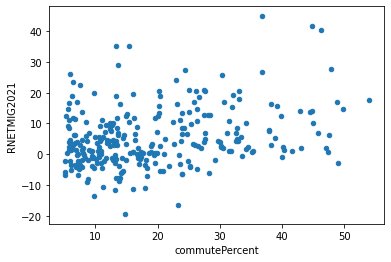

In [103]:
merged.plot.scatter('commutePercent', 'RNETMIG2021')

<AxesSubplot:xlabel='commutePercent', ylabel='RNETMIG2021'>

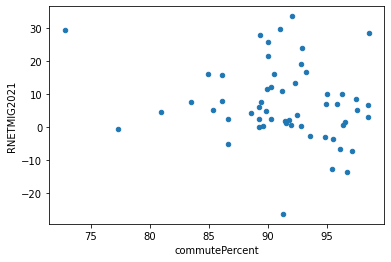

In [104]:
metro_merged.plot.scatter('commutePercent', 'RNETMIG2021')

In [105]:
smaller = merged[['commutePercent', 'RNETMIG2021']]
smaller.corr()

,commutePercent,RNETMIG2021
commutePercent,1.000000,0.297745
RNETMIG2021,0.297745,1.000000


In [106]:
smaller = metro_merged[['commutePercent', 'RNETMIG2021']]
smaller.corr()

,commutePercent,RNETMIG2021
commutePercent,1.00000,-0.19952
RNETMIG2021,-0.19952,1.00000


In [107]:
one = merged['RNETMIG2021'].sum() / merged['POPESTIMATE2020_y'].sum()

In [108]:
two = metro_merged['RNETMIG2021'].sum() / metro_merged['POPESTIMATE2020_y'].sum()

In [109]:
one/two

48.39191316137838

In [110]:
merged['RNETMIG2021'] / merged['POPESTIMATE2020_y']
metro_merged['RNETMIG2021'] / metro_merged['POPESTIMATE2020_y']

0     2.765986e-06
1     1.221764e-05
2     1.092163e-06
3     6.996955e-06
4    -5.603741e-07
5     2.585038e-07
6     5.919859e-06
7     6.822291e-08
8     1.920701e-06
9     1.205637e-06
10    5.150952e-06
11    4.368001e-06
12    2.536076e-06
13    4.467401e-08
14   -6.006707e-07
15    4.734527e-06
16    3.864650e-06
17    3.361817e-06
18    5.578058e-06
19    1.627032e-05
20    2.302538e-06
21    2.911758e-06
22   -9.622320e-07
23    4.801160e-06
24    1.801432e-06
25   -5.914526e-07
26    1.619812e-06
27    1.932642e-06
28    8.280330e-06
29   -4.087120e-06
30   -3.794484e-07
31    1.340568e-05
32    4.583296e-06
33    3.050502e-07
34    5.638989e-06
35    5.628255e-07
36    1.456865e-06
37    3.111352e-06
38    2.070516e-05
39    7.618171e-06
40    1.504614e-06
41    1.419034e-07
42    3.299849e-06
43    7.159016e-07
44    1.295770e-05
45    1.150401e-05
46   -2.019196e-06
47   -5.601330e-06
48    2.499059e-07
49   -7.248432e-07
50    6.620858e-06
51    7.957945e-06
52    1.3268

In [111]:
metro_merged['NPOPCHG_2020'].sum() / metro_merged['POPESTIMATE2020_y'].sum()

0.003827975319713283

In [112]:
merged['NPOPCHG_2020'].sum() / merged['POPESTIMATE2020_y'].sum()

8.307463174649432e-05